In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np

df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [2]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [3]:
df.dropna(inplace = True)

In [4]:
df_x = df[['cylinders', 'displacement', 'horsepower', 'weight']]

In [5]:
# 결측치 임의로 만들기
msv = np.random.randint(0, 389, size = 30)

In [6]:
df_x.iloc[msv] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [7]:
df_x.isna().sum()

cylinders       30
displacement    30
horsepower      30
weight          30
dtype: int64

In [8]:
# concat : 데이터프레임 옆으로 붙이기
# df_x : 결측치 입의로 설정한 데이터(30개)
# df : 결측치를 drop한 데이터
df_sp = pd.concat([df_x, df['mpg']], axis = 1)
df_sp1 = pd.concat([df_x, df['mpg']], axis = 1)
df_sp2 = pd.concat([df_x, df['mpg']], axis = 1)
df_sp3 = pd.concat([df_x, df['mpg']], axis = 1)
# df_sp(1~3)는 df_x에 df의 mpg 칼럼 붙인 데이터프레임으로 지정

<AxesSubplot:>

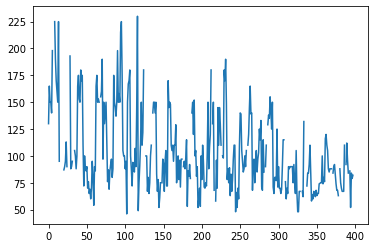

In [9]:
df_sp2.horsepower.plot()

## 1. 결측값 평균으로 대체하기
df_x : 결측치 임의로 추가한 데이터(각 30개씩 존재)

In [10]:
df_x.cylinders.mean()

5.469613259668508

In [11]:
df_x.displacement.mean()

193.61187845303868

In [12]:
df_x.horsepower.mean()

103.99723756906077

In [13]:
df_x.weight.mean()

2977.011049723757

In [14]:
# 결측치 대체하기 
df_sp1['cylinders'] = df_sp1['cylinders'].fillna(df_x.cylinders.mean())
df_sp1['displacement'] = df_sp1['displacement'].fillna(df_x.displacement.mean())
df_sp1['horsepower'] = df_sp1['horsepower'].fillna(df_x.horsepower.mean())
df_sp1['weight'] = df_sp1['weight'].fillna(df_x.cylinders.mean())

In [15]:
df_sp1.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [16]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split

# test_size : 테스트 데이터셋의 비율
# random_state : 학습시킬 데이터를 섞을 순서(여러 모델이 있을 겨우, 통일시키기)
x_train, x_test, y_train, y_test = train_test_split(df_sp1.drop('mpg', axis = 1), 
                                                    df_sp1['mpg'],
                                                    test_size = 0.3, 
                                                    random_state = 111)

In [17]:
import statsmodels.api as sm # 회귀 분석에 필요한 모듈
import matplotlib.pyplot as plt

In [18]:
fit_train1 = sm.OLS(y_train, x_train) # 다중 회귀분석 진행

In [19]:
fit_train1 = fit_train1.fit()

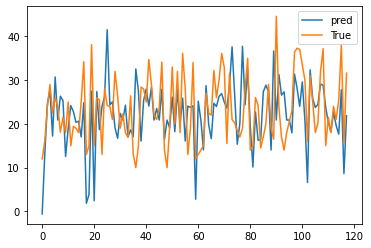

In [20]:
# 예측하기
plt.plot(np.array(fit_train1.predict(x_test)), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
# y_true : y의 실제값, y_pred : y를 예측한 값
print(mse1)
# 평균을 대체하여 나온 회귀식 예측결과, 실제값과 예측값의 mse가 64.47 정도로 나옴

65.2308648738929


## 2. 보간법을 이용해 결측값 대체하기(선형보간법)

In [22]:
df_sp2['cylinders'] = df_sp2['cylinders'].interpolate(method='linear')
df_sp2['displacement'] = df_sp2['displacement'].interpolate(method='linear')
df_sp2['horsepower'] = df_sp2['horsepower'].interpolate(method='linear')
df_sp2['weight'] = df_sp2['weight'].interpolate(method='linear')
# df_sp2의 결측치를 보간버븡로 대체한 후 그것을 다시 df_sp2로 지정

In [23]:
df_sp2.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [24]:
x_train, t_test, y_train, y_test = train_test_split(df_sp2.drop('mpg', axis = 1),
                                                    df_sp2['mpg'],
                                                    test_size = 0.3,
                                                    random_state = 111)

In [25]:
fit_train2 = sm.OLS(y_train, x_train)
fit_train2 = fit_train2.fit()
# 모델 적합시키기

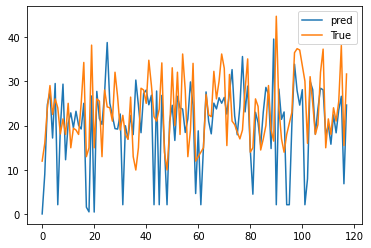

In [26]:
# 예측하기
plt.plot(np.array(fit_train2.predict(x_test)), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)
# 평균 대치 보다 선형보간이 더 높은 mse값이 나옴

92.94185585978084


### sklearn 패키지 - iterativeImputer(회귀대치)

In [28]:
imputer = IterativeImputer(imputation_order = 'descending',
                           max_iter = 10,
                           random_state = 111,
                           n_nearest_features = 4)

# imputation_order : 결측값 추정 기능이 전가되는 순서
# (descending : 결측값이 많은 특성에서 적은 특성으로) 
# n_nearest_features : 결측값을 추정하는데 사용할 다른 기능의 수(default : None)


df_sp3 = imputer.fit_transform(df_sp3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [29]:
df_sp3

array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [30]:
df_sp3 = pd.DataFrame(df_sp3)

In [31]:
df_sp3.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [32]:
df_sp3.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_sp3

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
387,4.0,140.0,86.0,2790.0,27.0
388,4.0,97.0,52.0,2130.0,44.0
389,4.0,135.0,84.0,2295.0,32.0
390,4.0,120.0,79.0,2625.0,28.0


In [33]:
x_train, x_test, y_train, y_test = train_test_split(df_sp3.drop('mpg',axis=1),
                                                    df_sp3['mpg'],
                                                    test_size=0.3,
                                                    random_state=111)

In [34]:
fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

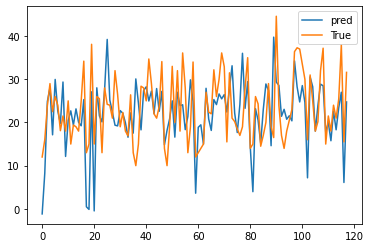

In [35]:
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

53.88462134170357


In [37]:
# 결측치 대체 결과 비교
print(mse1, '단순평균대치법')
print(mse2, '선형보간법')
print(mse3, 'iterative imputer')

65.2308648738929 단순평균대치법
92.94185585978084 선형보간법
53.88462134170357 iterative imputer


## 결측치를 대체할 때
- 도메인에 대한 지식을 가지고 칼럼을 보기
- 각 칼럼들간의 데이터 분포를 살펴보기
- 어떤 결측치 대체 방법을 사용할 지 고민한 후 선정하기

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

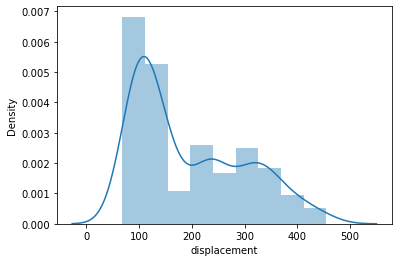

In [39]:
sns.distplot(df['displacement'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

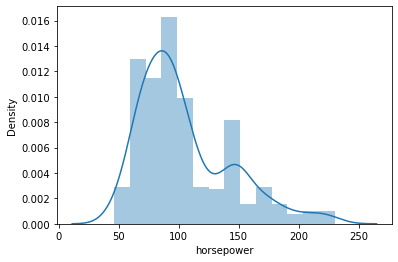

In [41]:
sns.distplot(df['horsepower'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

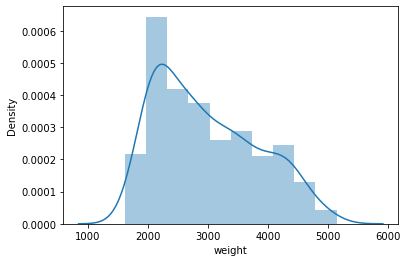

In [46]:
sns.distplot(df['weight'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cylinders', ylabel='Density'>

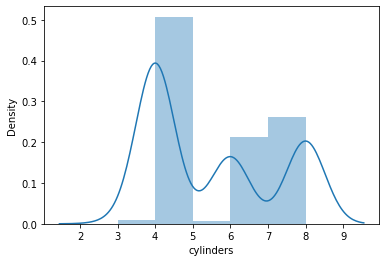

In [45]:
sns.distplot(df['cylinders'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

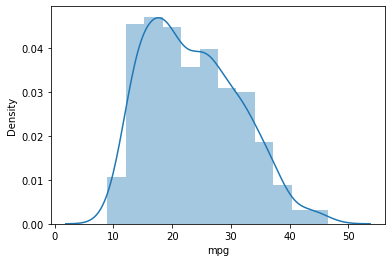

In [47]:
sns.distplot(df['mpg'])